#**EDA** for 'news_article_data_transformed.csv'





In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import nltk
from wordcloud import WordCloud
nltk.download('wordnet')
import nltk
import json
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
os.chdir('/content/drive/MyDrive')


In [4]:
df = pd.read_csv('news_article_data_transformed.csv')
df.head()

,Id,title,source URL,body,time,keywords,category,country,data source,language
0,DR-2014-000109-CHN,Worst drought in 63 years hits Liaoning provin...,https://www.scmp.com/news/china/article/157349...,Liaoning averaged 90mm across the province in ...,2014-08-14 07:00:00+00:00,"['averaged', 'liaoning', 'hits', 'dry', 'droug...",drought,China,news article,English
1,DR-2014-000109-CHN,"In Time Of Drought, U.S. West's Alfalfa Export...",https://www.npr.org/2014/08/12/339753108/in-ti...,"In Time Of Drought, U.S. West's Alfalfa Export...",2014-08-12 07:00:00+00:00,"['criticized', 'river', 'drought', 'farmers', ...",drought,China,news article,English
2,DR-2014-000109-CHN,"More Chinese on the Coast, Less Fish in the Se...",https://www.scientificamerican.com/article/mor...,China's booming economic growth is helping to ...,2014-08-08 07:00:00+00:00,"['bertness', 'chinese', 'research', 'sea', 'ec...",none,China,news article,English
3,DR-2014-000109-CHN,Climate change and drought in ancient times - ...,https://www.sciencedaily.com/releases/2014/08/...,The influence of climate on agriculture is bel...,2014-08-11 07:00:00+00:00,"['climate', 'drought', 'ancient', 'agriculture...",drought,China,news article,English
4,DR-2014-000109-CHN,California's severe drought unchanged despite ...,https://www.latimes.com/local/lanow/la-me-ln-r...,A series of thunderstorms that have hit Califo...,2014-08-07 07:00:00+00:00,"['drought', 'states', 'rain', 'despite', 'cali...",drought,China,news article,English


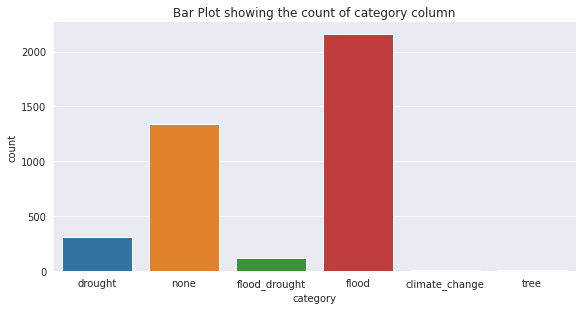

In [5]:
sns.set_style('darkgrid')
sns.catplot(x = "category",data = df, kind = "count",height=4,aspect=2).set(title = 'Bar Plot showing the count of category column')
# sns.title('Bar Plot showing the count of category column')

In [6]:
def word_count(text):
  length = len(text)
  return length
 
df['Word count of each Article'] = df['body'].apply(word_count)
df.head()

,Id,title,source URL,body,time,keywords,category,country,data source,language,Word count of each Article
0,DR-2014-000109-CHN,Worst drought in 63 years hits Liaoning provin...,https://www.scmp.com/news/china/article/157349...,Liaoning averaged 90mm across the province in ...,2014-08-14 07:00:00+00:00,"['averaged', 'liaoning', 'hits', 'dry', 'droug...",drought,China,news article,English,115
1,DR-2014-000109-CHN,"In Time Of Drought, U.S. West's Alfalfa Export...",https://www.npr.org/2014/08/12/339753108/in-ti...,"In Time Of Drought, U.S. West's Alfalfa Export...",2014-08-12 07:00:00+00:00,"['criticized', 'river', 'drought', 'farmers', ...",drought,China,news article,English,7642
2,DR-2014-000109-CHN,"More Chinese on the Coast, Less Fish in the Se...",https://www.scientificamerican.com/article/mor...,China's booming economic growth is helping to ...,2014-08-08 07:00:00+00:00,"['bertness', 'chinese', 'research', 'sea', 'ec...",none,China,news article,English,6430
3,DR-2014-000109-CHN,Climate change and drought in ancient times - ...,https://www.sciencedaily.com/releases/2014/08/...,The influence of climate on agriculture is bel...,2014-08-11 07:00:00+00:00,"['climate', 'drought', 'ancient', 'agriculture...",drought,China,news article,English,2452
4,DR-2014-000109-CHN,California's severe drought unchanged despite ...,https://www.latimes.com/local/lanow/la-me-ln-r...,A series of thunderstorms that have hit Califo...,2014-08-07 07:00:00+00:00,"['drought', 'states', 'rain', 'despite', 'cali...",drought,China,news article,English,2652


In [7]:
max(df['Word count of each Article']), min(df['Word count of each Article'])

(65535, 41)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each Article')

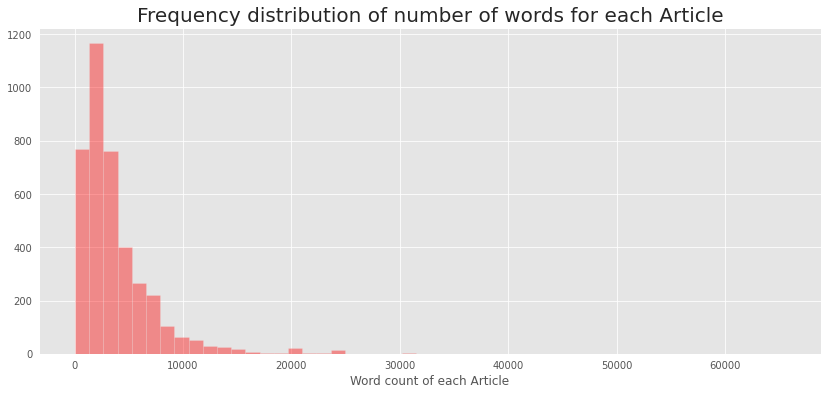

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
sns.distplot(df['Word count of each Article'],kde = False,color="red")
plt.title("Frequency distribution of number of words for each Article", size=20)

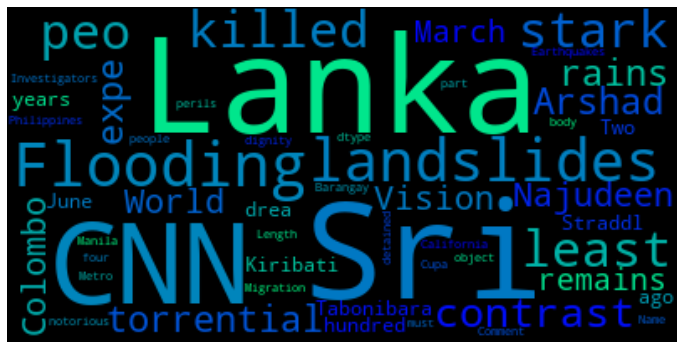

In [9]:
cloud=WordCloud(colormap="winter").generate(str(df[df['category'] == 'flood']["body"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

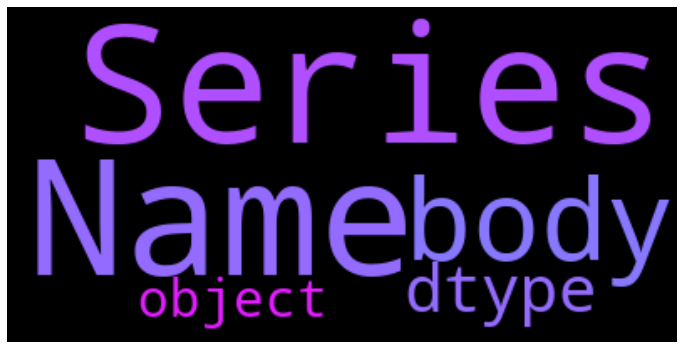

In [10]:
cloud=WordCloud(colormap="cool").generate(str(df[df['category'] == 'None']["body"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

Text(0.5, 1.0, '30 most frequent words')

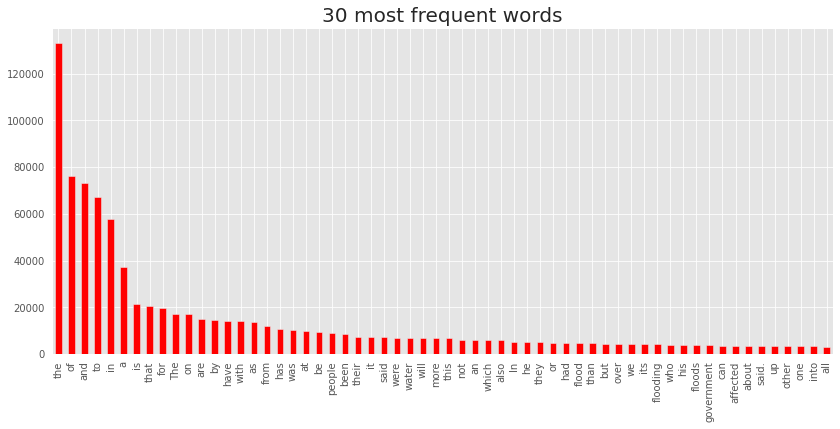

In [12]:

plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df["body"]).split()).value_counts()[:60]
freq.plot(kind="bar", color = "red")
plt.title("30 most frequent words",size=20)

In [14]:
df['time'] = pd.to_datetime(df['time'])

df['Which Day'] = df['time'].dt.day_name()
df['Year'] = df['time'].dt.year
df['Month'] = (df['time'].dt.month_name())

Text(0.5, 1.0, 'Frequecy showing which day has more data')

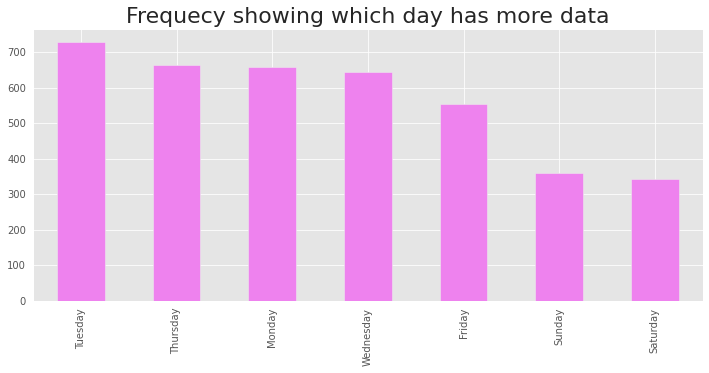

In [15]:
plt.figure(figsize = (12,5))
df['Which Day'].value_counts().plot(kind = 'bar', color = 'violet')
plt.title('Frequecy showing which day has more data', size = 22)

Text(0.5, 1.0, 'Frequecy showing which month has more data')

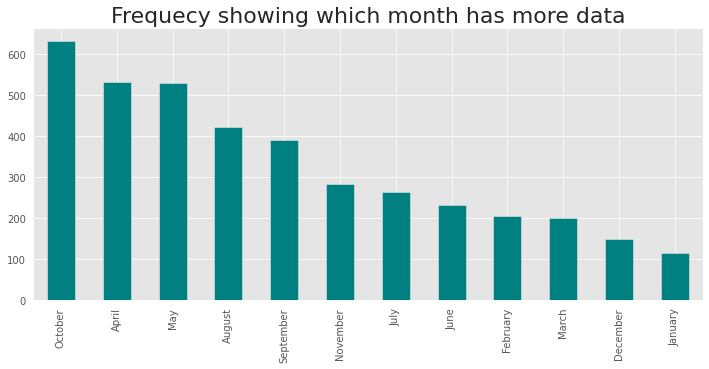

In [16]:
plt.figure(figsize = (12,5))
df['Month'].value_counts().plot(kind = 'bar', color = 'teal')
plt.title('Frequecy showing which month has more data', size = 22)

Text(0.5, 1.0, 'Frequecy showing which year has more data')

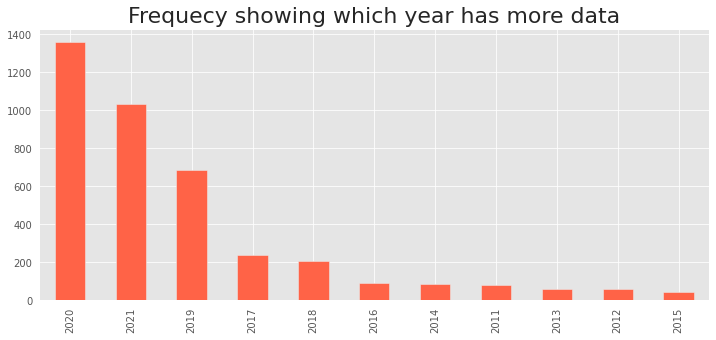

In [17]:
plt.figure(figsize = (12,5))
df['Year'].value_counts().plot(kind = 'bar', color = 'tomato')
plt.title('Frequecy showing which year has more data', size = 22)